# Código Python - Trabalho 2

## *Imports* estáticos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

## Declaração de variáveis repetidas

In [2]:
random_state = 42
alpha = 0.05
test_size = 0.3

## 4.1  Análise Exploratória de Dados
### 4.1.1   Leitura do ficheiro

In [3]:
dados = pd.read_csv('../../dados/AIRPOL_data.csv', delimiter=";", header=0, decimal=',')
dados = dados.drop(columns=['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']).rename(columns={"Value":"Premature_Deaths","Outcome":"Disease"})
#dados = dados[dados.Country != 'All Countries']
#dados.sort_values(by=['Value'])

### 4.1.4. Agrupamento dos dados em zonas

In [4]:
soutEuDados = dados[dados['Country'].isin(['Greece', 'Spain', 'Italy', 'Portugal'])]
soutEuDados

,Country,NUTS_Code,Air_Pollutant,Disease,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Premature_Deaths
1274,Greece,EL643,PM2.5,Chronic obstructive pulmonary disease,15469.0,243.2,7.6,0.0
1548,Portugal,PT16H,PM2.5,Chronic obstructive pulmonary disease,67529.0,1098.3,5.8,0.0
1552,Spain,ES417,PM2.5,Chronic obstructive pulmonary disease,72931.0,610.6,5.2,0.0
3094,Greece,EL412,PM2.5,Chronic obstructive pulmonary disease,26702.0,232.2,9.0,1.0
3096,Greece,EL621,PM2.5,Chronic obstructive pulmonary disease,27037.0,184.4,9.2,1.0
...,...,...,...,...,...,...,...,...
47743,Italy,IT,PM2.5,Chronic obstructive pulmonary disease,45750394.0,169657.2,11.7,4166.0
47763,Italy,IT,PM2.5,Lung cancer,45750394.0,169657.2,11.7,5373.0
47780,Italy,IT,PM2.5,Diabetes Mellitus,45750394.0,169657.2,11.7,9805.0
47787,Italy,IT,PM2.5,Ischemic heart disease,45750394.0,169657.2,11.7,10789.0


### 4.2.3 K-Fold cross validation

#### Preparação dos valores

In [5]:
goalAttrib = 'Premature_Deaths'
features = list(dados.columns[0:8])
numericFeatures = features[4:]
scaler = StandardScaler()

X = soutEuDados[numericFeatures].drop(columns=[goalAttrib])
y = soutEuDados[goalAttrib]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=random_state)

print("Stratified division of goal attribute:")
print(y_train.value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
print(y_test.value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Stratified division of goal attribute:
Premature_Deaths
0.0        13.5%
1.0         3.3%
2.0         2.6%
3.0         2.4%
4.0         2.1%
           ...  
2495.0      0.0%
1427.0      0.0%
28815.0     0.0%
1607.0      0.0%
353.0       0.0%
Name: proportion, Length: 1103, dtype: object
Premature_Deaths
0.0        13.3%
1.0         3.9%
2.0         2.8%
3.0         2.7%
4.0         2.1%
           ...  
252.0       0.0%
249.0       0.0%
3805.0      0.0%
863.0       0.0%
82410.0     0.0%
Name: proportion, Length: 678, dtype: object


#### Otimização dos parâmetros da Árvore de regressão e visualização

In [9]:
results = []
for max_depth in range(2, 11):
    for min_samples_split in [2, 5, 10]:
        for min_samples_leaf in [1, 2, 4]:
            dt = DecisionTreeRegressor(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=random_state
            )
            dt.fit(X_train_scaled, y_train)
            y_pred = dt.predict(X_test_scaled)

            result = {
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'mse': mean_squared_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }
            results.append(result)

resdf = pd.DataFrame(results)
resdf = resdf.sort_values(by='r2', ascending=False)
resdf

,max_depth,min_samples_split,min_samples_leaf,mse,r2
66,9,5,1,4.240477e+06,0.486007
64,9,2,2,4.241367e+06,0.485899
67,9,5,2,4.241379e+06,0.485897
63,9,2,1,4.241646e+06,0.485865
58,8,5,2,4.248278e+06,0.485061
...,...,...,...,...,...
4,2,5,2,5.298347e+06,0.357781
1,2,2,2,5.298347e+06,0.357781
3,2,5,1,5.298347e+06,0.357781
2,2,2,4,5.298347e+06,0.357781


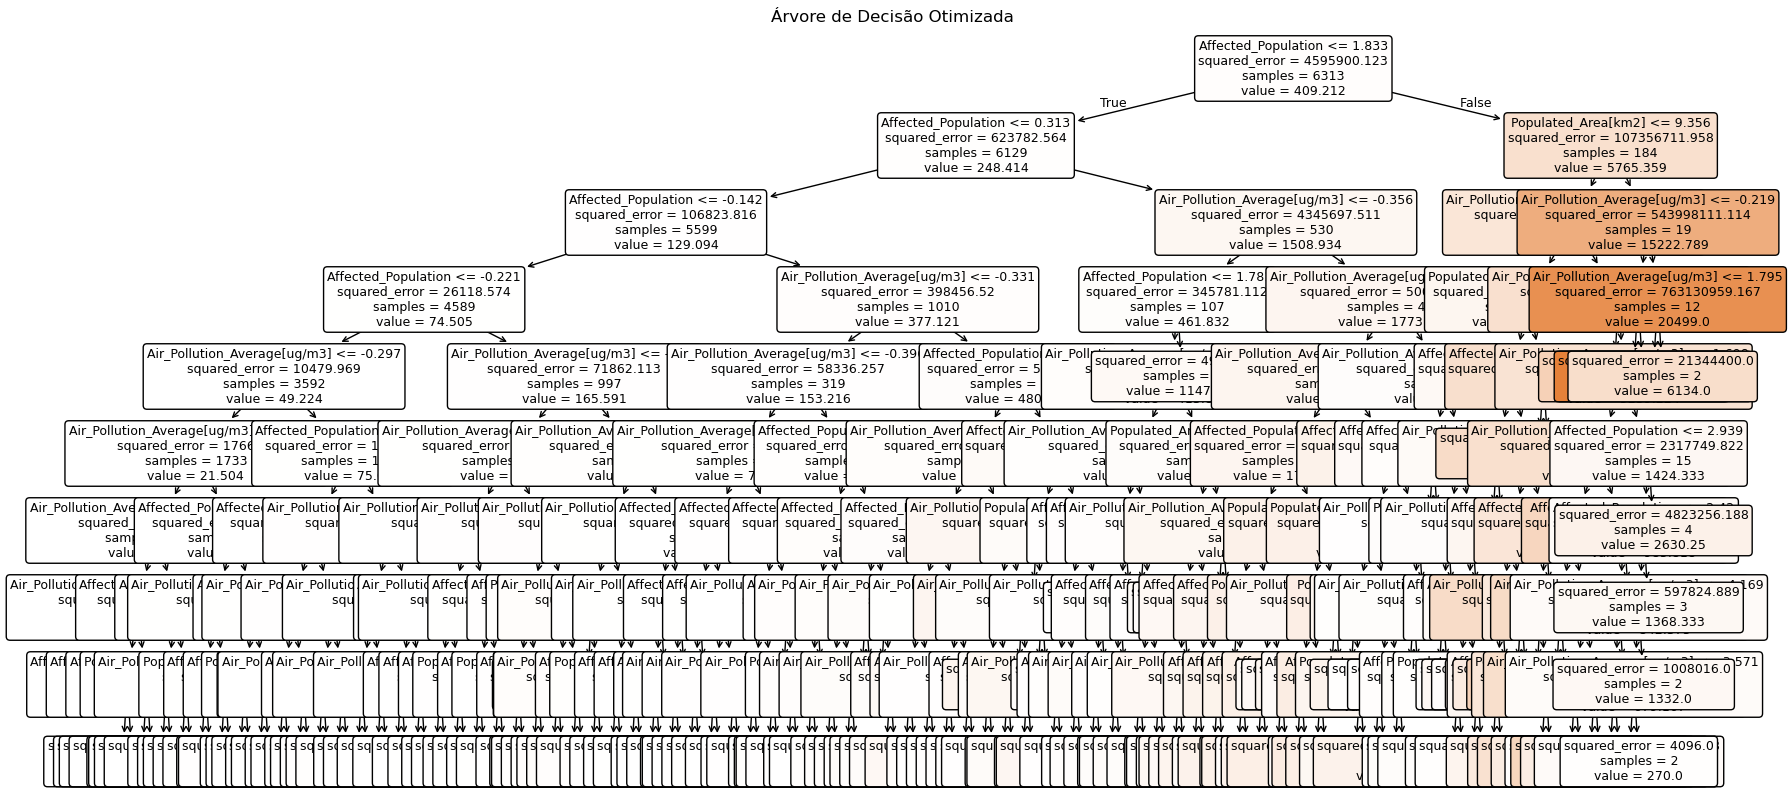

In [8]:
best_tree = DecisionTreeRegressor(
    max_depth=9,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=random_state
)
best_tree.fit(X_train_scaled, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(
    best_tree,
    filled=True,
    feature_names=X_train.columns,
    rounded=True,
    fontsize=9
)
plt.title("Árvore de Decisão Otimizada")
plt.show()

#### Otimização do kernel SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    # initialize and train SVM
    svm_model = SVC(kernel=kernel, random_state=random_state)
    acc_scores = cross_val_score(svm_model, X_train_scaled, y_train, scoring='accuracy', cv=10) # Normalmente, convém ter cv=20
    # store results
    results[kernel] = { 'accuracy': acc_scores }
    print(f"\nKernel: {kernel}")
    print(f"Avg. accuracy: {round(np.mean(acc_scores),3)} +/- ({round(np.std(acc_scores),3)})")

C:\Users\35193\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(



Kernel: linear
Avg. accuracy: 0.135 +/- (0.003)


C:\Users\35193\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(



Kernel: rbf
Avg. accuracy: 0.135 +/- (0.002)


C:\Users\35193\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(



Kernel: poly
Avg. accuracy: 0.136 +/- (0.003)


Com isto, vemos que o melhor kernel é o "poly"
#### Otimização da configuração da rede neuronal

In [ ]:
def regressmodelevaluation(name_model, y_test, y_pred):
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    mse = round(mean_squared_error(y_test, y_pred), 3)
    rmse = round(np.sqrt(mse), 3)
    r2 = round(r2_score(y_test, y_pred), 3)
    mape = round(mean_absolute_percentage_error(y_test, y_pred), 3)
    return pd.Series({'Model': name_model, 'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2, 'mape': mape})

In [ ]:
results = []
ncols = X_train.shape[1]

for solv in ['lbfgs', 'sgd', 'adam']:
    for nodes in range(2,ncols):
        mlp = MLPRegressor(hidden_layer_sizes=nodes,
                           activation='tanh',
                           solver=solv,
                           max_iter=1000,
                           learning_rate='adaptive',
                           early_stopping=True,
                           random_state=random_state)
        mlp.fit(X_train_scaled, y_train)

        y_pred = mlp.predict(X_test_scaled)
        result = regressmodelevaluation(f'{solv} {nodes}', y_test, y_pred)
        results.append(result)
    
resdf = pd.DataFrame(results)
resdf

,Model,mae,mse,rmse,r2,mape
0,lbfgs 2,593.941,7495146.109,2737.726,0.092,1.297402e+17
1,sgd 2,477.940,7708266.922,2776.377,0.066,1.020709e+17
2,adam 2,453.225,8455178.998,2907.779,-0.025,2.439093e+14


In [ ]:
results = []
for solv in ['lbfgs', 'sgd', 'adam']:
    for nodes1 in range(2,6):
        for nodes2 in range(3,7):
            mlp = MLPRegressor(hidden_layer_sizes=(nodes1, nodes2),
                        activation='tanh',
                        solver=solv,
                        max_iter=1000,
                        learning_rate='adaptive',
                        early_stopping=True,
                        random_state=random_state)
            mlp.fit(X_train_scaled, y_train)

            y_pred = mlp.predict(X_test_scaled)
            result = regressmodelevaluation(f'{solv} {nodes1} {nodes2}', y_test, y_pred)
            results.append(result)
    
resdf = pd.DataFrame(results)
resdf.sort_values(by='r2', ascending=False)

,Model,mae,mse,rmse,r2,mape
10,lbfgs 4 5,564.981,6634056.208,2575.666,0.196,2.002603e+17
7,lbfgs 3 6,528.174,6792455.926,2606.234,0.177,1.100848e+17
27,sgd 4 6,500.758,6942985.060,2634.954,0.158,1.138653e+17
4,lbfgs 3 3,570.899,7306377.619,2703.031,0.114,2.066506e+17
3,lbfgs 2 6,547.130,7318503.798,2705.273,0.113,1.492466e+17
18,sgd 2 5,511.142,7349924.150,2711.074,0.109,9.364126e+16
9,lbfgs 4 4,543.044,7430539.571,2725.902,0.099,1.430968e+17
2,lbfgs 2 5,524.031,7442893.842,2728.167,0.098,7.579495e+16
20,sgd 3 3,514.020,7504409.096,2739.418,0.090,1.130998e+17
21,sgd 3 4,539.612,7508277.399,2740.124,0.090,1.383509e+17


: 

Com isto, vemos que o melhor modelo é o lbfgs 4 5

### 4.2.4 -> Compare os resultados obtidos pelos modelos na questão 5, usando o erro médio absoluto (MAE) e a raiz quadrada do erro médio (RMSE).

#### Com o K-Fold Cross Validation, n_splits = 5

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)

models = []
models.append(('rgr', LinearRegression()))
models.append(('dtr', DecisionTreeRegressor(
        max_depth=9,
        min_samples_split=5,
        min_samples_leaf=1,
        random_state=random_state
    )))
models.append(('net', MLPRegressor(hidden_layer_sizes=(4, 5),
                        activation='tanh',
                        solver='lbfgs',
                        max_iter=1000,
                        learning_rate='adaptive',
                        early_stopping=True,
                        random_state=random_state)))
models.append(('svm', SVC(kernel='poly', random_state=random_state)))

lstresults = []

for name, model in models:
    # RMSE
    mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    rmse_scores = (-mse_scores) ** 0.5

    # MAE
    mae_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores

    lstresults.append(pd.Series({
        'model': name,
        'mean_RMSE': round(np.mean(rmse_scores), 3),
        'std_RMSE': round(np.std(rmse_scores), 3),
        'mean_MAE': round(np.mean(mae_scores), 3),
        'std_MAE': round(np.std(mae_scores), 3),
    }))
    print(f"Model {name} done")

resdf = pd.DataFrame(lstresults)
resdf.sort_values(by=['mean_RMSE', 'mean_MAE'], ascending=True)

Model rgr done
Model dtr done
Model net done
Model svm done


,model,mean_RMSE,std_RMSE,mean_MAE,std_MAE
2,net,2070.886,554.695,594.638,35.237
3,svm,1952.161,478.504,397.478,42.326
0,rgr,1790.371,491.885,431.241,39.974
1,dtr,1762.727,408.783,397.446,44.374


#### A arvore de decisão é o melhor modelo, porque apresenta um RMSE e um MAE mais reduzidos que todos os modelos referidos

#### Apesar que o SVM apresenta um MAE ligeiramente menor que o da a Regressão Linear Múltipla, apresenta o RMSE mais elevado dentro de todos os modelos referidos, portando o segundo melhor modelo é o da Regressão Linear Múltipla.

### 4.2.5 -> Justificar se os resultados obtidos para os dois melhores modelos são estatisticamente significativos

#### Será usado o RMSE, já que são apresentados valores com pouca diferença na sua média

In [7]:
kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)

models = []
models.append(('rgr', LinearRegression()))
models.append(('dtr', DecisionTreeRegressor(
        max_depth=9,
        min_samples_split=5,
        min_samples_leaf=1,
        random_state=random_state
    )))

lstresults = []
rgr_results_rmse = []
dtr_results_rmse = []

for name, model in models:
    # RMSE
    mse_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    rmse_scores = (-mse_scores) ** 0.5

    # MAE
    mae_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores

    if name == 'rgr':
        rgr_results_rmse = rmse_scores
        rgr_results_mae = mae_scores
    else:
        dtr_results_rmse = rmse_scores
        dtr_results_mae = mae_scores

In [8]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

t_stat_mae_rgr, p_value_mae_rgr = shapiro(rgr_results_mae)
t_stat_mae_dtr, p_value_mae_dtr = shapiro(dtr_results_mae)
print(f"Shapiro-Wilk MAE RGR: p-value={p_value_mae_rgr}")
print(f"Shapiro-Wilk MAE DTR: p-value={p_value_mae_dtr}")

if p_value_mae_rgr > alpha and p_value_mae_dtr > alpha:
    print("MAE de RGR e DTR seguem distribuição normal.")
    t_stat, p_val_t = ttest_ind(rgr_results_mae, dtr_results_mae, equal_var=False)
    print(f"Teste t de Student (MAE): p-value={p_val_t}")
    if p_val_t < alpha:
        print("MAE de RGR e DTR são significativamente diferentes.")
    else:
        print("MAE de RGR e DTR não são significativamente diferentes.")
else:
    print("MAE de RGR e DTR não seguem distribuição normal.")
    u_stat, p_val_u = mannwhitneyu(rgr_results_mae, dtr_results_mae)
    print(f"Teste U de Mann-Whitney (MAE): p-value={p_val_u}")
    if p_val_u < alpha:
        print("MAE de RGR e DTR são significativamente diferentes.")
    else:
        print("MAE de RGR e DTR não são significativamente diferentes.")

print("\n---\n")

t_stat_rmse_rgr, p_value_rmse_rgr = shapiro(rgr_results_rmse)
t_stat_rmse_dtr, p_value_rmse_dtr = shapiro(dtr_results_rmse)
print(f"Shapiro-Wilk RMSE RGR: p-value={p_value_rmse_rgr}")
print(f"Shapiro-Wilk RMSE DTR: p-value={p_value_rmse_dtr}")

if p_value_rmse_rgr > alpha and p_value_rmse_dtr > alpha:
    print("RMSE de RGR e DTR seguem distribuição normal.")
    t_stat, p_val_t = ttest_ind(rgr_results_rmse, dtr_results_rmse, equal_var=False)
    print(f"Teste t de Student (RMSE): p-value={p_val_t}")
    if p_val_t < alpha:
        print("RMSE de RGR e DTR são significativamente diferentes.")
    else:
        print("RMSE de RGR e DTR não são significativamente diferentes.")
else:
    print("RMSE de RGR e DTR não seguem distribuição normal.")
    u_stat, p_val_u = mannwhitneyu(rgr_results_rmse, dtr_results_rmse)
    print(f"Teste U de Mann-Whitney (RMSE): p-value={p_val_u}")
    if p_val_u < alpha:
        print("RMSE de RGR e DTR são significativamente diferentes.")
    else:
        print("RMSE de RGR e DTR não são significativamente diferentes.")

Shapiro-Wilk MAE RGR: p-value=0.3757974591274675
Shapiro-Wilk MAE DTR: p-value=0.33149195988361
MAE de RGR e DTR seguem distribuição normal.
Teste t de Student (MAE): p-value=0.009963750337823743
MAE de RGR e DTR são significativamente diferentes.

---

Shapiro-Wilk RMSE RGR: p-value=0.9155115817497372
Shapiro-Wilk RMSE DTR: p-value=0.5146458989680982
RMSE de RGR e DTR seguem distribuição normal.
Teste t de Student (RMSE): p-value=0.677859010854925
RMSE de RGR e DTR não são significativamente diferentes.
